In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ionização #

In [2]:
#carregar dados ionização
c_110 = pd.read_csv("I_c_110.csv")
c_100 = pd.read_csv("I_c_100.csv")
c_115 = pd.read_csv("I_c_115.csv")
c_108 = pd.read_csv("I_C_108.csv")
c_122 = pd.read_csv("I_C_122.csv")
c_105 = pd.read_csv("I_C_105.csv")

c_110.columns = ["tensão", "corrente"]
c_100.columns = ["tensão", "corrente"]
c_115.columns = ["tensão", "corrente"]
c_108.columns = ["tensão", "corrente"]
c_105.columns = ["tensão", "corrente"]
c_122.columns = ["tensão", "corrente"]

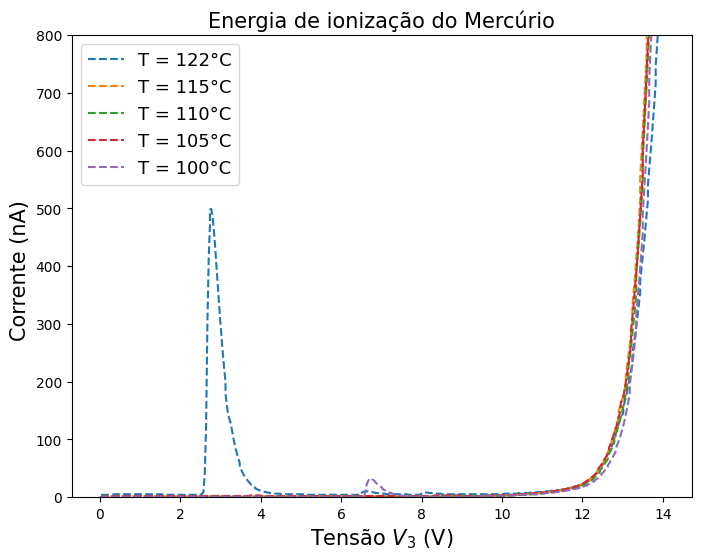

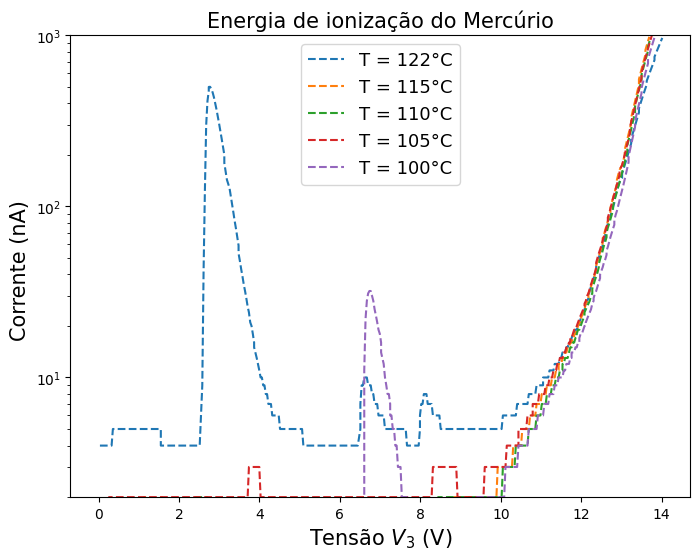

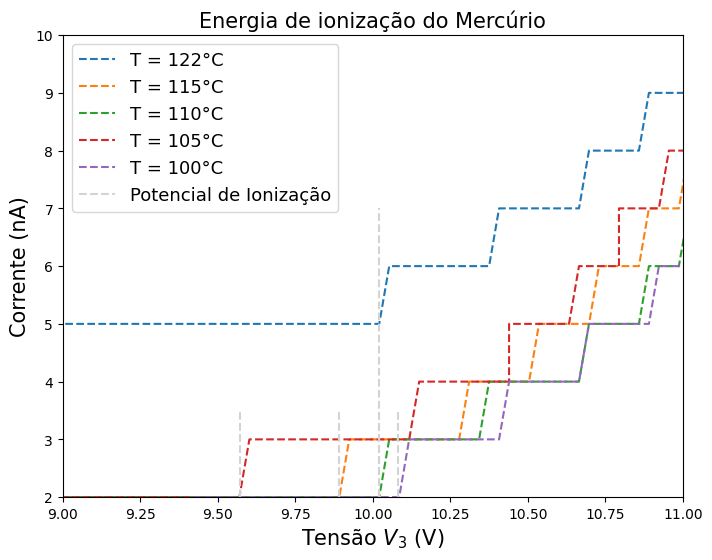

In [3]:
c_115_ion = c_115[(c_115["corrente"] < 1000)]
c_110_ion = c_110[(c_110["corrente"] < 1000)]
c_100_ion = c_100[(c_100["corrente"] < 1000)]
c_105_ion = c_105[(c_105["corrente"] < 1000) & (c_105["tensão"] > 0)]
c_122_ion = c_122[(c_122["corrente"] < 1000) & (c_122["tensão"] > 0)]
c_108_ion = c_108[(c_108["corrente"] < 1000) & (c_108["tensão"] > 0)]

#Gráfico sem irregularidades da ionização

plt.figure(figsize=(8,6))
plt.plot(c_122_ion["tensão"], c_122_ion["corrente"], linestyle=('--'), label="T = 122°C")
plt.plot(c_115_ion["tensão"], c_115_ion["corrente"], linestyle=('--'), label="T = 115°C")
plt.plot(c_110_ion["tensão"], c_110_ion["corrente"], linestyle=('--'), label="T = 110°C")
plt.plot(c_105_ion["tensão"], c_105_ion["corrente"], linestyle=('--'), label="T = 105°C")
plt.plot(c_100_ion["tensão"], c_100_ion["corrente"], linestyle=('--'), label="T = 100°C")
plt.ylim((0, 800))
plt.legend(fontsize=13)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente (nA) ",fontsize=15)
plt.title("Energia de ionização do Mercúrio", fontsize=15)
plt.show()

#Grafico com dados tratados em escala monolog

plt.figure(figsize=(8,6))
plt.plot(c_122_ion["tensão"], c_122_ion["corrente"], linestyle=('--'), label="T = 122°C")
plt.plot(c_115_ion["tensão"], c_115_ion["corrente"], linestyle=('--'), label="T = 115°C")
plt.plot(c_110_ion["tensão"], c_110_ion["corrente"], linestyle=('--'), label="T = 110°C")
plt.plot(c_105_ion["tensão"], c_105_ion["corrente"], linestyle=('--'), label="T = 105°C")
plt.plot(c_100_ion["tensão"], c_100_ion["corrente"], linestyle=('--'), label="T = 100°C")
plt.yscale('log')
plt.legend(fontsize=13)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente (nA) ",fontsize=15)
plt.ylim(2, 1000 )
plt.title("Energia de ionização do Mercúrio", fontsize=15)
plt.show()

#Gráfico com zoom
# Potencial de ionização observado nos dados do 100°C a 122°C

pot_ion = [10.08, 9.57, 10.02, 9.89, 10.02]
ymin = [2]*5
ymax=[3.5, 3.5, 3.5, 3.5, 7 ]

plt.figure(figsize=(8,6))
plt.plot(c_122_ion["tensão"], c_122_ion["corrente"], linestyle=('--'), label="T = 122°C")
plt.plot(c_115_ion["tensão"], c_115_ion["corrente"], linestyle=('--'), label="T = 115°C")
plt.plot(c_110_ion["tensão"], c_110_ion["corrente"], linestyle=('--'), label="T = 110°C")
plt.plot(c_105_ion["tensão"], c_105_ion["corrente"], linestyle=('--'), label="T = 105°C")
plt.plot(c_100_ion["tensão"], c_100_ion["corrente"], linestyle=('--'), label="T = 100°C")
plt.vlines(x=pot_ion,ymin=ymin, ymax=ymax, color="lightgray", linestyle="--", label="Potencial de Ionização")
plt.ylim((2, 10))
plt.xlim((9, 11))
plt.legend(fontsize=13, loc="upper left")
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente (nA)",fontsize=15)
plt.title("Energia de ionização do Mercúrio", fontsize=15)
plt.show()

# Múltiplas colisões #

In [4]:
b_171 = pd.read_csv("MC_171.csv")
b_163 = pd.read_csv("MC_163.csv")
b_155 = pd.read_csv("MC_155.csv")
b_140 = pd.read_csv("MC_140.csv")
b_165 = pd.read_csv("MC_165_3.csv")
b_177 = pd.read_csv("MC_177.csv")
b_180 = pd.read_csv("MC_180.csv")


b_171.columns = ["tensão", "corrente"]
b_163.columns = ["tensão", "corrente"]
b_155.columns = ["tensão", "corrente"]
b_140.columns = ["tensão", "corrente"]
b_165.columns = ["tensão", "corrente"]
b_177.columns = ["tensão", "corrente"]
b_180.columns = ["tensão", "corrente"]

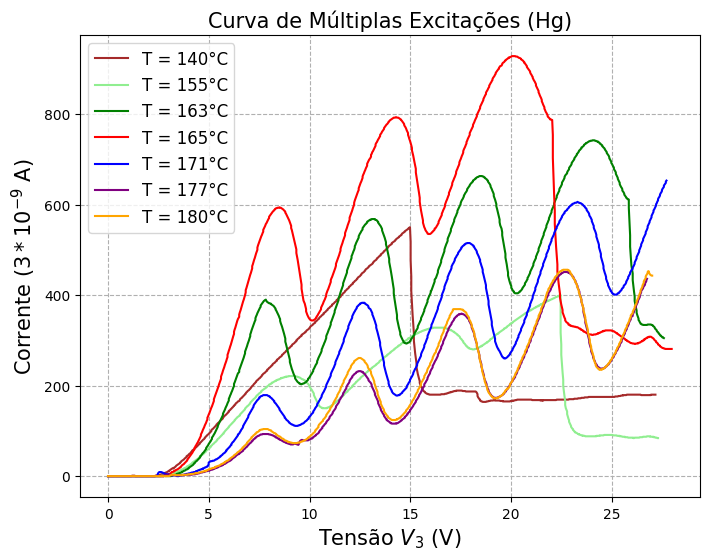

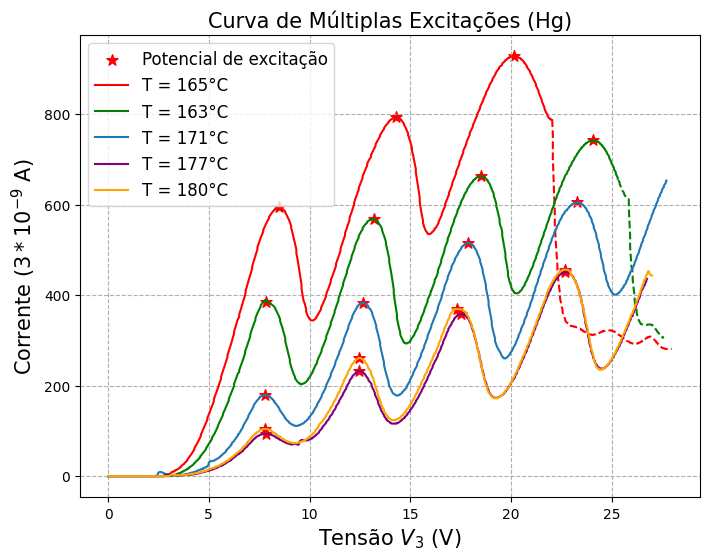

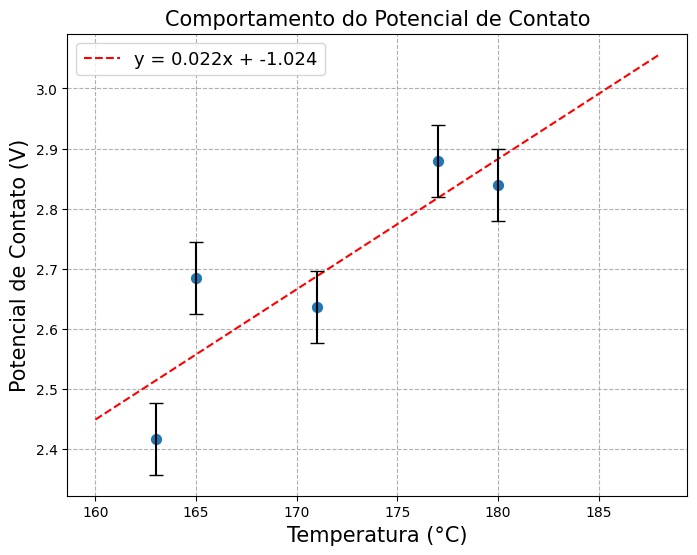

In [5]:
# Estudo das múltiplas colisões para diferentes temperaturas

# Lista dos pontos mínimos

def media_contato(dados, erro_V=0.03):
  soma = 0
  erro = 0
  for i in range(1, len(dados)):
    soma = soma + (dados[i] - dados[i-1])
    erro = erro + 2*erro_V
  media = soma/float(i)
  contato = dados[0] - media
  erro_P = erro/float(i)
  erro_E = erro_P + erro_V
  return media, contato, erro_P, erro_E

min_V_171 = [9.3438, 14.3379, 19.6864, 25.1638]
min_A_171 = [111, 178, 260, 401]
max_V_171 = [7.8, 12.64, 17.88, 23.29]
max_A_171 = [179, 383, 515, 606]
med_171, cont_171, erro_171_V, erro_171_E = media_contato(max_V_171)

min_V_163 = [9.5693, 14.7889, 20.2663]
min_A_163 = [203, 293, 404]
max_V_163 = [7.83, 13.18, 18.53, 24.07]
max_A_163 = [385, 568, 663, 742]
med_163, cont_163, erro_163_V, erro_163_E = media_contato(max_V_163)

min_V_165 = [10.0849, 15.9167 ]
min_A_165 = [344, 535]
max_V_165 = [8.5, 14.27, 20.13]
max_A_165 = [594, 793, 928]
med_165, cont_165, erro_165_V, erro_165_E = media_contato(max_V_165)

min_V_177 = [9.11826, 14.1768, 19.2675, 24.4872]
min_A_177 = [70, 116, 173, 237]
max_V_177 = [7.83, 12.47, 17.53, 22.68]
max_A_177 = [93, 232, 359, 451]
med_177, cont_177, erro_177_V, erro_177_E = media_contato(max_V_177)

min_V_180 = [9.2144, 14.1768, 19.2353, 24.4227]
max_V_180 = [7.8, 12.47, 17.33, 22.68]
max_A_180 = [104, 261, 369, 456]
min_A_180 = [73, 124, 173, 235]
med_180, cont_180, erro_180_V, erro_180_E = media_contato(max_V_180)

# Temperaturas e Potenciais de contato

T = [163, 165, 171, 177, 180]

energia = [med_163, med_165, med_171, med_177, med_180]
P_cont = [cont_163, cont_165, cont_171, cont_177, cont_180]
erro_P = [erro_163_V, erro_165_V, erro_171_V, erro_177_V, erro_180_V]
erro_E = [erro_163_E, erro_165_E, erro_171_E, erro_177_E, erro_180_E]
# Recortar os dados em suas irregularidades

b_165_bom = b_165[b_165["tensão"] < 22]
b_165_ruim = b_165[b_165["tensão"] > 22]

b_163_bom = b_163[b_163["tensão"] < 25.3]
b_163_ruim = b_163[b_163["tensão"] > 25.3]

# Gráfico das curvas de múltiplas colisões com anomalias

plt.figure(figsize=(8,6))
plt.plot(b_140["tensão"], b_140["corrente"], label="T = 140°C", c="brown")
plt.plot(b_155["tensão"], b_155["corrente"], label="T = 155°C", c="lightgreen")
plt.plot(b_163["tensão"], b_163["corrente"], label="T = 163°C", c="g")
plt.plot(b_165["tensão"], b_165["corrente"], label="T = 165°C", c="r")
plt.plot(b_171["tensão"], b_171["corrente"], label="T = 171°C", c="b")
plt.plot(b_177["tensão"], b_177["corrente"], label="T = 177°C", c="purple")
plt.plot(b_180["tensão"], b_180["corrente"], label="T = 180°C", c="orange")
plt.grid(True, linestyle ="--")
plt.title("Curva de Múltiplas Excitações (Hg)", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Gráfico das curvas de múltiplas colisões sem anomalias

plt.figure(figsize=(8,6))
plt.scatter(x=max_V_171, y=max_A_171, marker="*", s=70, c ="red", label="Potencial de excitação")
plt.scatter(x=max_V_163, y=max_A_163, marker="*", s=70, c ="red")
plt.scatter(x=max_V_165, y=max_A_165, marker="*", s=70, c ="red")
plt.scatter(x=max_V_177, y=max_A_177, marker="*", s=70, c ="red")
plt.scatter(x=max_V_180, y=max_A_180, marker="*", s=70, c ="red")
plt.plot(b_165_bom["tensão"], b_165_bom["corrente"], label="T = 165°C", c="r")
plt.plot(b_165_ruim['tensão'], b_165_ruim["corrente"], c="r", linestyle="--")
plt.plot(b_163_bom["tensão"], b_163_bom["corrente"], label="T = 163°C", c="g")
plt.plot(b_163_ruim["tensão"], b_163_ruim["corrente"], c="g", linestyle="--")
plt.plot(b_171["tensão"], b_171["corrente"], label="T = 171°C")
plt.plot(b_177["tensão"], b_177["corrente"], label="T = 177°C", c="purple")
plt.plot(b_180["tensão"], b_180["corrente"], label="T = 180°C", c="orange")
plt.grid(True, linestyle ="--")
plt.title("Curva de Múltiplas Excitações (Hg)", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Gráfico dos potenciais de contato em função das temperaturas

from sklearn.linear_model import LinearRegression


erro = []
x = np.arange(160, 190, 2)
ln = LinearRegression()
model = ln.fit(np.array(T).reshape(-1, 1), P_cont)
y = model.predict(np.array(x).reshape(-1, 1))

plt.figure(figsize=(8,6))
plt.scatter(T, P_cont, s=50)
plt.plot(x, y, linestyle="--", label=f"y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}", color="r")
plt.errorbar(T, P_cont, yerr=[erro_P], ecolor="black", elinewidth=1.5, capsize=5, capthick=1,
             color='black', linestyle="none",)
plt.grid(True, linestyle="--")
# plt.ylim(3.8, 4.4)
plt.legend(fontsize=13)
plt.xlabel("Temperatura (°C)", fontsize=15)
plt.ylabel("Potencial de Contato (V)", fontsize=15)
plt.title("Comportamento do Potencial de Contato", fontsize=15)
plt.show()

#Potencial de contato diminui conforme aumentamos a temperatura, por isso há o deslocamento das curvas com a diminuição da temperatura


In [6]:
def mean_err(dados):
  soma = 0
  count = 0
  for i in dados:
    count =+ 1
    soma =+ i**2
  err = np.sqrt(soma/count)
  return err

print(P_cont, np.mean(P_cont))
print(energia, np.mean(energia))
print(erro_P, mean_err(erro_P))
print(erro_E, mean_err(erro_E))

[2.416666666666666, 2.6850000000000005, 2.6366666666666667, 2.88, 2.84] 2.6916666666666664
[5.413333333333334, 5.8149999999999995, 5.163333333333333, 4.95, 4.96] 5.2603333333333335
[0.06, 0.06, 0.06, 0.06, 0.06] 0.06
[0.09, 0.09, 0.09, 0.09, 0.09] 0.09


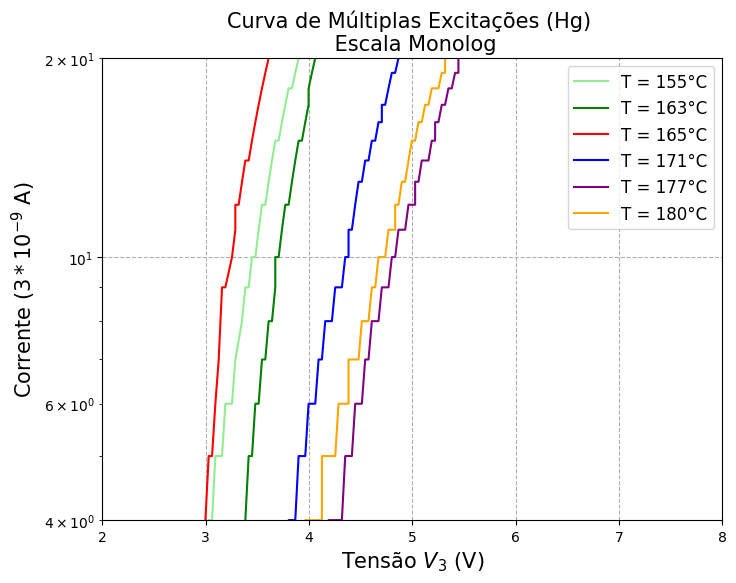

In [7]:
new_171 = b_171[b_171["tensão"] > 3.5]

plt.figure(figsize=(8,6))
plt.plot(b_155["tensão"], b_155["corrente"], label="T = 155°C", c="lightgreen")
plt.plot(b_163["tensão"], b_163["corrente"], label="T = 163°C", c="g")
plt.plot(b_165["tensão"], b_165["corrente"], label="T = 165°C", c="r")
plt.plot(new_171["tensão"], new_171["corrente"], label="T = 171°C", c="b")
plt.plot(b_177["tensão"], b_177["corrente"], label="T = 177°C", c="purple")
plt.plot(b_180["tensão"], b_180["corrente"], label="T = 180°C", c="orange")
plt.grid(True, linestyle ="--")
plt.yscale("log")
plt.title(f"Curva de Múltiplas Excitações (Hg) \n Escala Monolog", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.xlim(2,8)
plt.ylim(4,20)
plt.show()

# Estudo V1



In [12]:
# Carregamento dos dados de temperatura 160 para variação de V1

b_162_2 = pd.read_csv("V1_162_2.csv")
b_162_3 = pd.read_csv("V1_162_3.csv")
b_162_4 = pd.read_csv("V1_162_4.csv")
b_162_1 = pd.read_csv("V1_163.csv")


b_162_1.columns = ["tensão", "corrente"]
b_162_2.columns = ["tensão", "corrente"]
b_162_3.columns = ["tensão", "corrente"]
b_162_4.columns = ["tensão", "corrente"]

# Carregamento dos dados de temperatura 170 para variação de V1

b_170_3 = pd.read_csv("V1_171_2.csv")
b_170_2 = pd.read_csv("V1_172_3.csv")
b_170_4 = pd.read_csv("V1_174_4.csv")
b_170_1 = pd.read_csv("MC_171.csv")

b_170_1.columns = ["tensão", "corrente"]
b_170_2.columns = ["tensão", "corrente"]
b_170_3.columns = ["tensão", "corrente"]
b_170_4.columns = ["tensão", "corrente"]


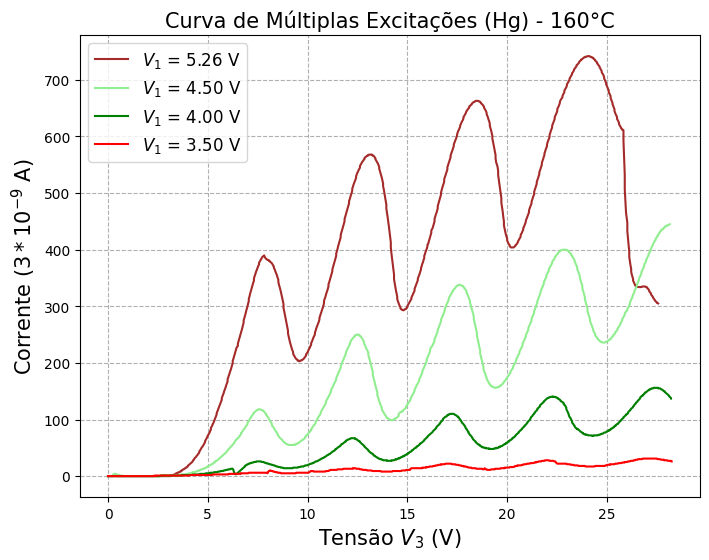

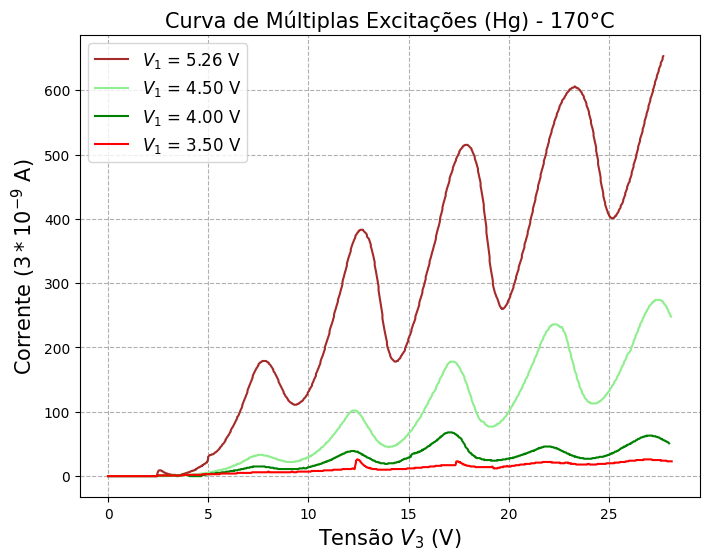

In [13]:
# Gráfico variação V1 para 160°C

plt.figure(figsize=(8,6))
plt.plot(b_162_1["tensão"], b_162_1["corrente"], label=r"$V_1$ = 5.26 V", c="brown")
plt.plot(b_162_2["tensão"], b_162_2["corrente"], label=r"$V_1$ = 4.50 V", c="lightgreen")
plt.plot(b_162_3["tensão"], b_162_3["corrente"], label=r"$V_1$ = 4.00 V", c="g")
plt.plot(b_162_4["tensão"], b_162_4["corrente"], label=r"$V_1$ = 3.50 V", c="r")
plt.grid(True, linestyle ="--")
plt.title("Curva de Múltiplas Excitações (Hg) - 160°C", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Gráfico variação V1 para 170°C

plt.figure(figsize=(8,6))
plt.plot(b_170_1["tensão"], b_170_1["corrente"], label=r"$V_1$ = 5.26 V", c="brown")
plt.plot(b_170_2["tensão"], b_170_2["corrente"], label=r"$V_1$ = 4.50 V", c="lightgreen")
plt.plot(b_170_3["tensão"], b_170_3["corrente"], label=r"$V_1$ = 4.00 V", c="g")
plt.plot(b_170_4["tensão"], b_170_4["corrente"], label=r"$V_1$ = 3.50 V", c="r")
plt.grid(True, linestyle ="--")
plt.title("Curva de Múltiplas Excitações (Hg) - 170°C", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Estudo V4

In [15]:
#Carregamento dos dados da variação de V4 para 160°

b_162_2 = pd.read_csv("V4_159_2.csv")
b_162_3 = pd.read_csv("V4_161_3.csv")
b_162_4 = pd.read_csv("V4_162_4.csv")
b_162_5 = pd.read_csv("V4_162_5.csv")
b_162_1 = pd.read_csv("V4_163.csv")

b_162_1.columns = ["tensão", "corrente"]
b_162_2.columns = ["tensão", "corrente"]
b_162_3.columns = ["tensão", "corrente"]
b_162_4.columns = ["tensão", "corrente"]
b_162_5.columns = ["tensão", "corrente"]

#Carregamento dos dados da variação de V4 para 170°

b_170_2 = pd.read_csv("V4_171_2.csv")
b_170_3 = pd.read_csv("V4_173_3.csv")
b_170_4 = pd.read_csv("V4_170_4.csv")
b_170_5 = pd.read_csv("V4_168_5.csv")
b_170_1 = pd.read_csv("V4_171.csv")

b_170_1.columns = ["tensão", "corrente"]
b_170_2.columns = ["tensão", "corrente"]
b_170_3.columns = ["tensão", "corrente"]
b_170_4.columns = ["tensão", "corrente"]
b_170_5.columns = ["tensão", "corrente"]

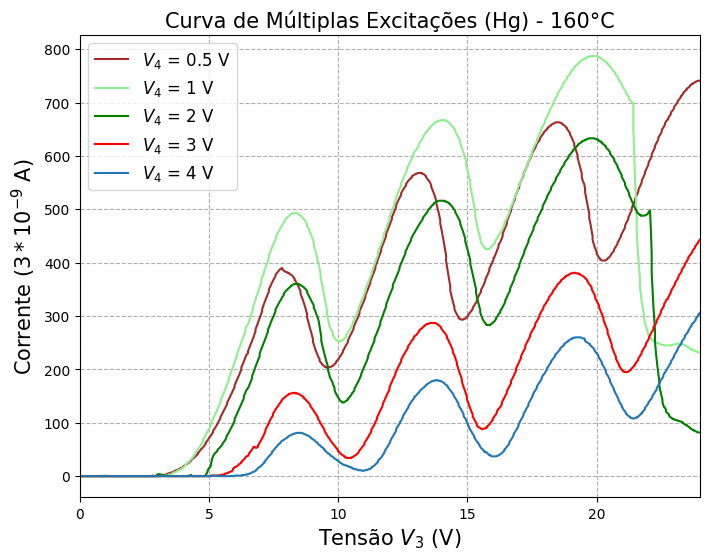

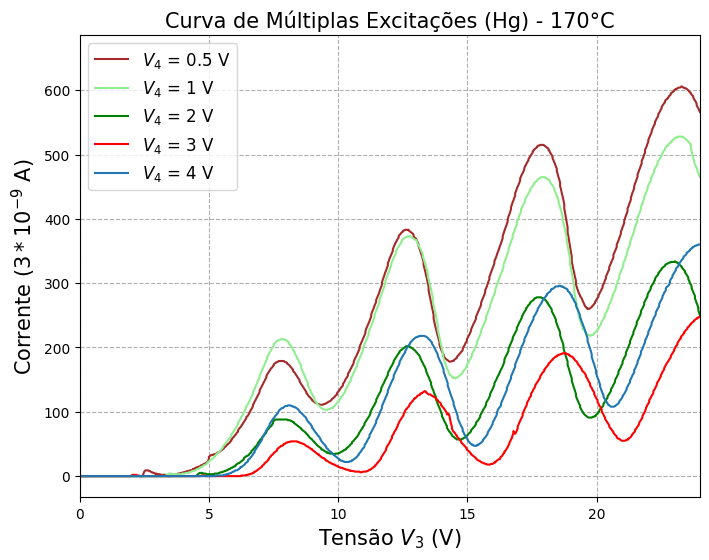

In [16]:
# Gráfico variação V4 para 160°C

plt.figure(figsize=(8,6))
plt.plot(b_162_1["tensão"], b_162_1["corrente"], label=r"$V_4$ = 0.5 V", c="brown")
plt.plot(b_162_2["tensão"], b_162_2["corrente"], label=r"$V_4$ = 1 V", c="lightgreen")
plt.plot(b_162_3["tensão"], b_162_3["corrente"], label=r"$V_4$ = 2 V", c="g")
plt.plot(b_162_4["tensão"], b_162_4["corrente"], label=r"$V_4$ = 3 V", c="r")
plt.plot(b_162_5["tensão"], b_162_5["corrente"], label=r"$V_4$ = 4 V")
plt.grid(True, linestyle ="--")
plt.title("Curva de Múltiplas Excitações (Hg) - 160°C", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.xlim(0, 24)
plt.legend(fontsize=12)
plt.show()

# Gráfico variação V4 para 170°C

plt.figure(figsize=(8,6))
plt.plot(b_170_1["tensão"], b_170_1["corrente"], label=r"$V_4$ = 0.5 V", c="brown")
plt.plot(b_170_2["tensão"], b_170_2["corrente"], label=r"$V_4$ = 1 V", c="lightgreen")
plt.plot(b_170_3["tensão"], b_170_3["corrente"], label=r"$V_4$ = 2 V", c="g")
plt.plot(b_170_4["tensão"], b_170_4["corrente"], label=r"$V_4$ = 3 V", c="r")
plt.plot(b_170_5["tensão"], b_170_5["corrente"], label=r"$V_4$ = 4 V")
plt.grid(True, linestyle ="--")
plt.xlim(0, 24)
plt.title("Curva de Múltiplas Excitações (Hg) - 170°C", fontsize=15)
plt.xlabel(r"Tensão $V_3$ (V)", fontsize=15)
plt.ylabel(r"Corrente ($3*10^{-9}$ A)", fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Uma colisão

In [17]:
#Dicionário dos dados

# V2 constante = 6.22

# (Vazio)    V1 = 6 / V3 = 22.5 / V4 = 6
# ( _V4 )       =   /    =      / V4 = 4
# ( _V4_2 )     =   /    =      / V4 = 3
# ( _V13 )   V1 = 4 / V3 = 13.5 / V4 = 6
# ( _V13_2 ) V1 = 3 /    =      /    =
# ( _V13_3 ) V1 = 3 / V3 = 10.1 /    =

#Carregamento dos dados com escala 3*10-9

A_175 = pd.read_csv("A_175.csv")
A_180 = pd.read_csv("A_180.csv")
A_165 = pd.read_csv("A_165.csv")
A_160 = pd.read_csv("A_160.csv")

A_175.columns = ["tensão", "corrente"]
A_180.columns = ["tensão", "corrente"]
A_165.columns = ["tensão", "corrente"]
A_160.columns = ["tensão", "corrente"]

#Fazer isso vezes 3 para levar a escala 1*10-9 ou vezes 10 para levar a 0.3*10-9

#Carregamento dos dados com escala 1*10-9

A_175_V4 = pd.read_csv("A_175_2.csv")
A_137_V13 = pd.read_csv("A_137_V13.csv")

A_175_V4.columns = ["tensão", "corrente"]
A_137_V13.columns = ["tensão", "corrente"]

#Fazer isso dividido por 3 para levar a escala 3*10-9 ou dividido por 0.3 para levar a 0.3*10-9

#Carregamento dos dados com escala 0.3*10-9

A_175_V4_2 = pd.read_csv("A_175_3.csv")
A_175_V13 = pd.read_csv("A_175_V13.csv")
A_170_V13 = pd.read_csv("A_170_V13.csv")
A_163_V13 = pd.read_csv("A_163_V13.csv")
A_152_V13 = pd.read_csv("A_152_V13.csv")
A_123_V13 = pd.read_csv("A_123_V13.csv")
A_115_V13_3 = pd.read_csv("A_114_V13_2.csv")

A_175_V4_2.columns = ["tensão", "corrente"]
A_175_V13.columns = ["tensão", "corrente"]
A_170_V13.columns = ["tensão", "corrente"]
A_163_V13.columns = ["tensão", "corrente"]
A_152_V13.columns = ["tensão", "corrente"]
A_123_V13.columns = ["tensão", "corrente"]
A_115_V13_3.columns = ["tensão", "corrente"]

#Carregamento dos dados com escala 0.1*10

A_115_V13_2 = pd.read_csv("A_115_V13.csv")
A_123_V13_2 = pd.read_csv("A_124_V13_2.csv")

A_115_V13_2.columns = ["tensão", "corrente"]
A_123_V13_2.columns = ["tensão", "corrente"]

#Fazer isso dividido por 3 para levar a escala 0.3*10-9

#Transformação da escala da corrente para 0.3*10-9

A_175["corrente"] = A_175["corrente"]*10
A_180["corrente"] = A_180["corrente"]*10
A_160["corrente"] = A_160["corrente"]*10
A_165["corrente"] = A_165["corrente"]*10
A_175_V4["corrente"] = A_175_V4["corrente"]/0.3
A_137_V13["corrente"] = A_137_V13["corrente"]/0.3
A_115_V13_2["corrente"] = A_115_V13_2["corrente"]/3
A_123_V13_2["corrente"] = A_123_V13_2["corrente"]/3


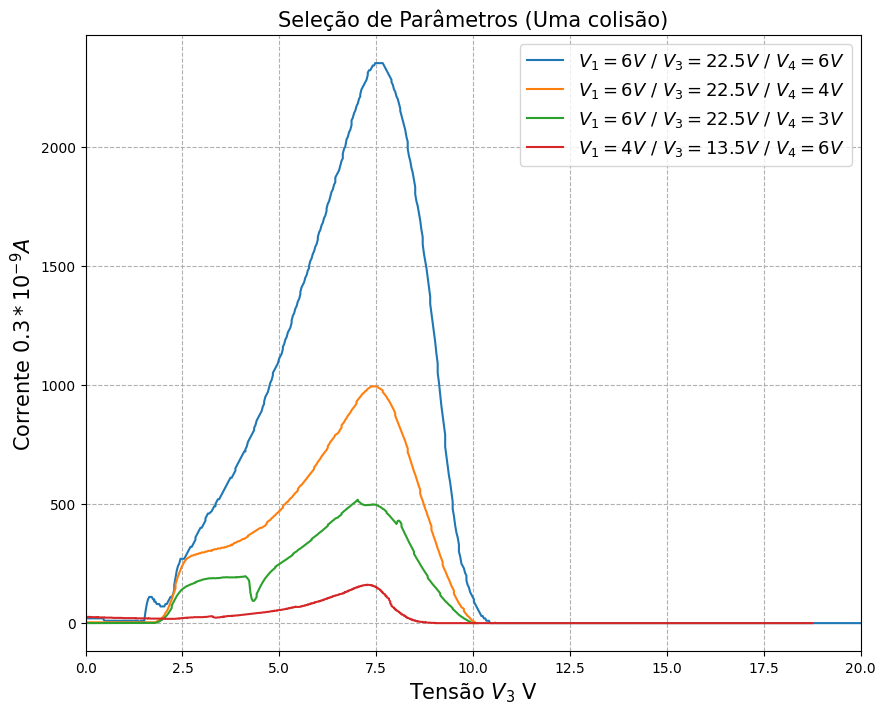

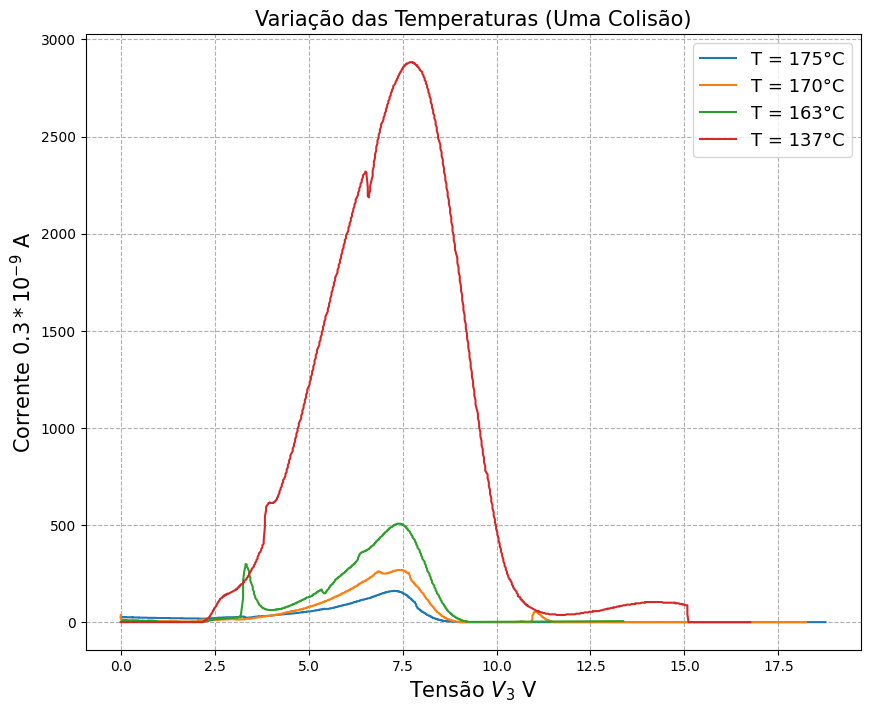

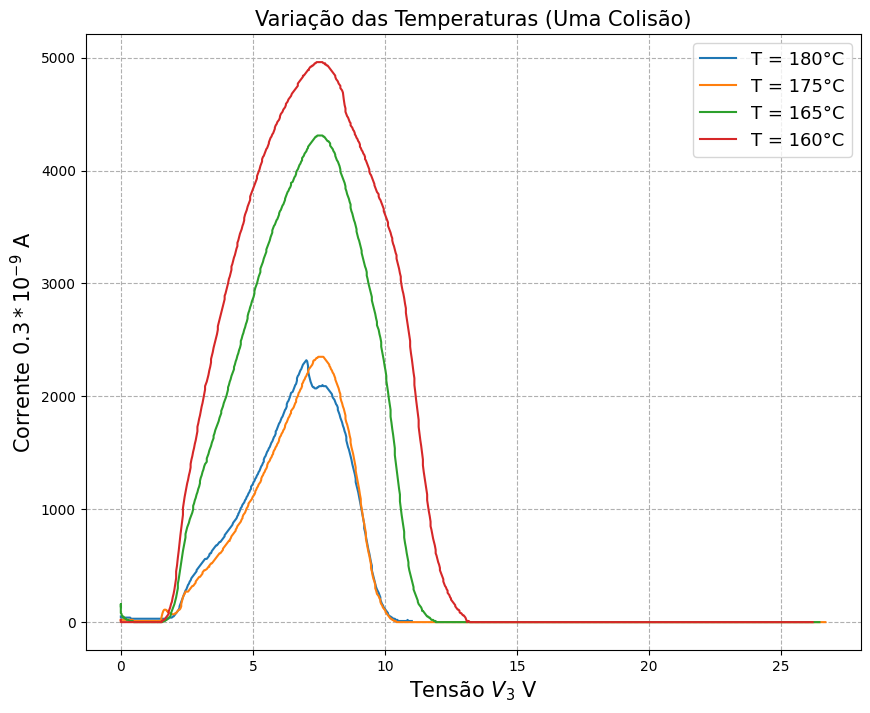

In [18]:
#Gráfico dos ajustes dos parâmetros

A_175_V4_2 = A_175_V4_2[A_175_V4['corrente'] > 0]
A_175_V4 = A_175_V4[A_175_V4['corrente'] > 0]

plt.figure(figsize=(10,8))
plt.plot(A_175["tensão"], A_175["corrente"], label=r"$V_1 = 6V$ / $V_3 = 22.5V$ / $V_4 = 6V$")
plt.plot(A_175_V4['tensão'], A_175_V4["corrente"], label=r"$V_1 = 6V$ / $V_3 = 22.5V$ / $V_4 = 4V$")
plt.plot(A_175_V4_2["tensão"], A_175_V4_2["corrente"], label=r"$V_1 = 6V$ / $V_3 = 22.5V$ / $V_4 = 3V$")
plt.plot(A_175_V13["tensão"], A_175_V13['corrente'], label=r"$V_1 = 4V$ / $V_3 = 13.5V$ / $V_4 = 6V$")
plt.legend(fontsize=13)
plt.xlabel(r"Tensão $V_3$ V", fontsize=15)
plt.ylabel(r"Corrente $0.3 * 10^{-9} A$", fontsize=15)
plt.title("Seleção de Parâmetros (Uma colisão)", fontsize=15)
plt.xlim(0, 20)
plt.grid(True, linestyle="--")
plt.show()


# Gráfico de diferentes temperaturas na melhor configuração

A_163_V13 = A_163_V13[A_163_V13['corrente'] > 0]

plt.figure(figsize=(10,8))
plt.plot(A_175_V13["tensão"], A_175_V13["corrente"], label="T = 175°C")
plt.plot(A_170_V13["tensão"], A_170_V13["corrente"], label="T = 170°C")
plt.plot(A_163_V13["tensão"], A_163_V13["corrente"], label="T = 163°C")
plt.plot(A_137_V13["tensão"], A_137_V13["corrente"], label="T = 137°C")
plt.title("Variação das Temperaturas (Uma Colisão)", fontsize = 15)
plt.xlabel(r"Tensão $V_3$ V", fontsize=15)
plt.ylabel(r"Corrente $0.3*10^{-9}$ A", fontsize=15)
# plt.vlines(x=7.59, ymin=0, ymax=3000, linestyle="--", linewidth=2, color="gray", label="Pot. de Exc. Esperado")
plt.legend(fontsize=13)
plt.grid(True, linestyle="--")
plt.show()

# Gráfico de diferentes temperaturas na melhor configuração
A_180 = A_180[A_180['corrente'] > 0]

plt.figure(figsize=(10,8))
plt.plot(A_180["tensão"], A_180["corrente"], label="T = 180°C")
plt.plot(A_175["tensão"], A_175["corrente"], label="T = 175°C")
plt.plot(A_165["tensão"], A_165["corrente"], label="T = 165°C")
plt.plot(A_160["tensão"], A_160["corrente"], label="T = 160°C")
plt.title("Variação das Temperaturas (Uma Colisão)", fontsize = 15)
plt.xlabel(r"Tensão $V_3$ V", fontsize=15)
plt.ylabel(r"Corrente $0.3*10^{-9}$ A", fontsize=15)
# plt.vlines(x=7.59, ymin=0, ymax=5000, linestyle="--", linewidth=2, color="gray", label="Pot. de Exc. Esperado")
plt.legend(fontsize=13)
plt.grid(True, linestyle="--")
plt.show()



#Ne e He

In [20]:
# Carregamento dos dados de Ne e He

def tratamento(dados):
  dados_2 = pd.DataFrame()
  dados_2 = dados["#"].str.split("\t", expand=True)
  dados_2.columns = ['tensão', 'corrente']
  dados_2['tensão'] = pd.to_numeric(dados_2['tensão'], errors='coerce')
  dados_2['corrente'] = pd.to_numeric(dados_2['corrente'], errors='coerce')
  dados_2 = dados_2.drop([0,1,2], axis=0)
  return dados_2

He_1 = tratamento(pd.read_csv("He_1.csv"))
He_2 = tratamento(pd.read_csv("He_2.csv"))
He_3 = tratamento(pd.read_csv("He_3.csv"))
He_5 = tratamento(pd.read_csv("He_5.csv"))
He_6 = tratamento(pd.read_csv("He_6.csv"))
Ne_1 = tratamento(pd.read_csv("Ne_1.csv"))
Ne_2 = tratamento(pd.read_csv("Ne_2.csv"))
Ne_3 = tratamento(pd.read_csv("Ne_3.csv"))
Ne_4 = tratamento(pd.read_csv("Ne_4.csv"))

He_6 = He_6[He_6["tensão"] < 35]
He_6["corrente"] = He_6["corrente"]/10


In [21]:
He_1['media_movel'] = He_1['corrente'].rolling(window=3).mean()
He_2['media_movel'] = He_2['corrente'].rolling(window=3).mean()
He_3['media_movel'] = He_3['corrente'].rolling(window=3).mean()
He_5['media_movel'] = He_5['corrente'].rolling(window=3).mean()
He_6['media_movel'] = He_6['corrente'].rolling(window=3).mean()

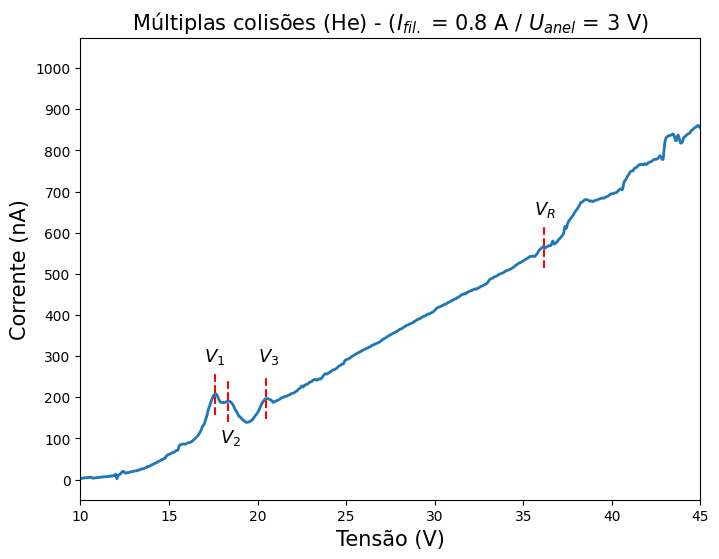

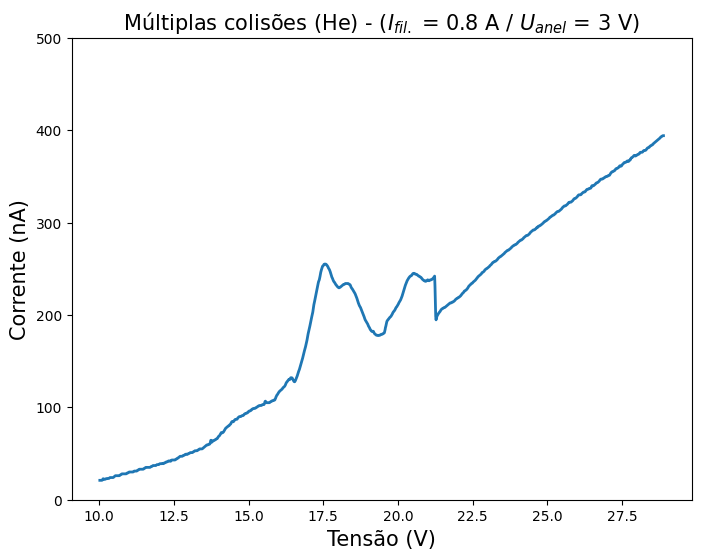

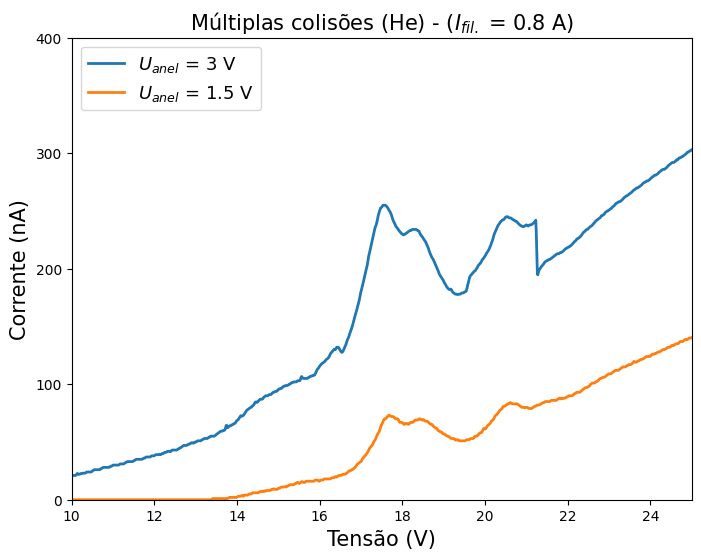

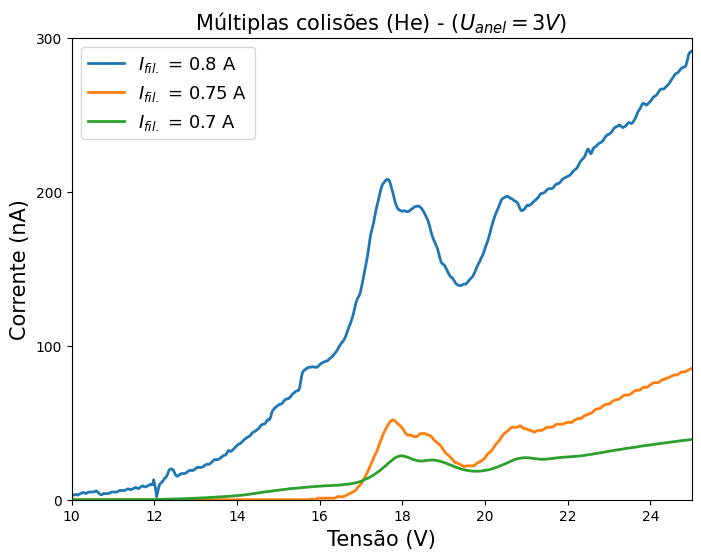

In [22]:
v1_He = 17.599
v2_He = 18.349
v3_He = 20.5
vr_He = 36.160
v0 = vr_He - 2*v1_He
ve1_He = vr_He - v1_He
ve2_He = v0 + v2_He
ve3_He = v0 + v3_He

energias = [ve1_He, ve2_He, ve3_He]

# Gráfico padrão He U=3V

x_line = [17.599, 18.349, 20.5, 36.16]
ymin = [158, 141, 147, 515]
ymax = [258, 241, 247, 615]
ylabel_ticks = np.arange(0, 1100, 100)

plt.figure(figsize=(8,6))
plt.plot(He_1["tensão"], He_1["media_movel"], linewidth=2)
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (He) - ($I_{fil.}$ = 0.8 A / $U_{anel}$ = 3 V)", fontsize=15)
plt.ylabel("Corrente (nA)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.vlines(x=x_line, ymin=ymin, ymax=ymax, linestyle="--", color="red")
plt.text(17, 288, s=r"$V_1$", fontsize=13)
plt.text(17.9, 91, s=r"$V_2$", fontsize=13)
plt.text(20, 288, s=r"$V_3$", fontsize=13)
plt.text(35.6, 645, s=r"$V_R$", fontsize=13)
plt.xlim(10,45)
plt.show()

#Gráfico zoom He U=3V

plt.figure(figsize=(8,6))
plt.plot(He_2["tensão"], He_2["media_movel"], linewidth=2)
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (He) - ($I_{fil.}$ = 0.8 A / $U_{anel}$ = 3 V)", fontsize=15)
plt.ylabel("Corrente (nA)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylim(0,500)
plt.show()

#Gráfico zoom He comparando as tensões no anel

plt.figure(figsize=(8,6))
plt.plot(He_2["tensão"], He_2["media_movel"], linewidth=2, label=r"$U_{anel}$ = 3 V")
plt.plot(He_3["tensão"], He_3["media_movel"], linewidth=2, label=r"$U_{anel}$ = 1.5 V")
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (He) - ($I_{fil.}$ = 0.8 A)", fontsize=15)
plt.ylabel("Corrente (nA)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylim(0,400)
plt.xlim(10,25)
plt.legend(fontsize=13, loc="upper left")
plt.show()

#Gráfico padrão comparando as correntes no filamento

plt.figure(figsize=(8,6))
plt.plot(He_1["tensão"], He_1["media_movel"], linewidth=2, label=r"$I_{fil.}$ = 0.8 A")
plt.plot(He_5["tensão"], He_5["media_movel"], linewidth=2, label=r"$I_{fil.}$ = 0.75 A")
plt.plot(He_6["tensão"], He_6["media_movel"], linewidth=2, label=r"$I_{fil.}$ = 0.7 A")
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (He) - ($U_{anel} = 3 V$)", fontsize=15)
plt.ylabel("Corrente (nA)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.xlim(10, 25)
plt.ylim(0, 300)
plt.legend(fontsize=13)
plt.show()

In [23]:
print(energias)
print(v0)

[18.560999999999996, 19.310999999999996, 21.461999999999996]
0.9619999999999962


In [24]:
Ne_1['media_movel'] = Ne_1['corrente'].rolling(window=3).mean()
Ne_2['media_movel'] = Ne_2['corrente'].rolling(window=3).mean()
Ne_3['media_movel'] = Ne_3['corrente'].rolling(window=3).mean()
Ne_4['media_movel'] = Ne_4['corrente'].rolling(window=3).mean()

#Neônio

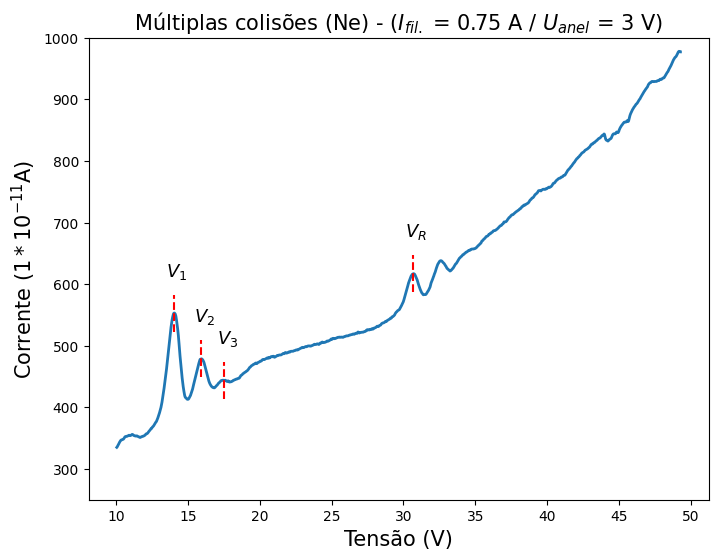

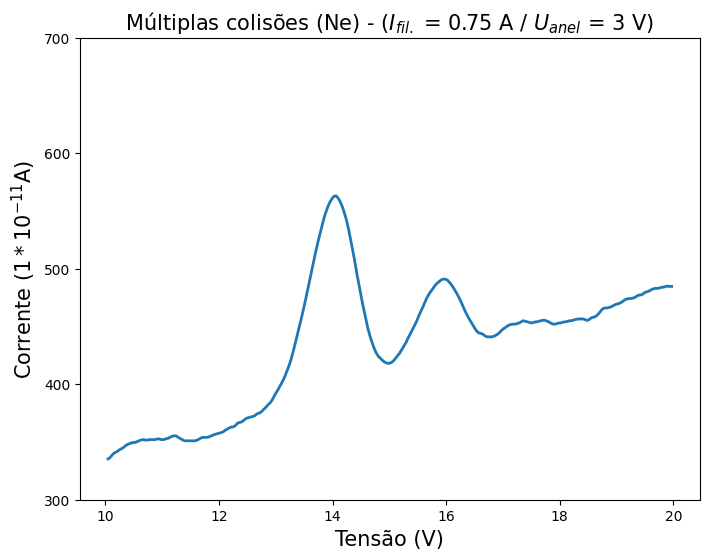

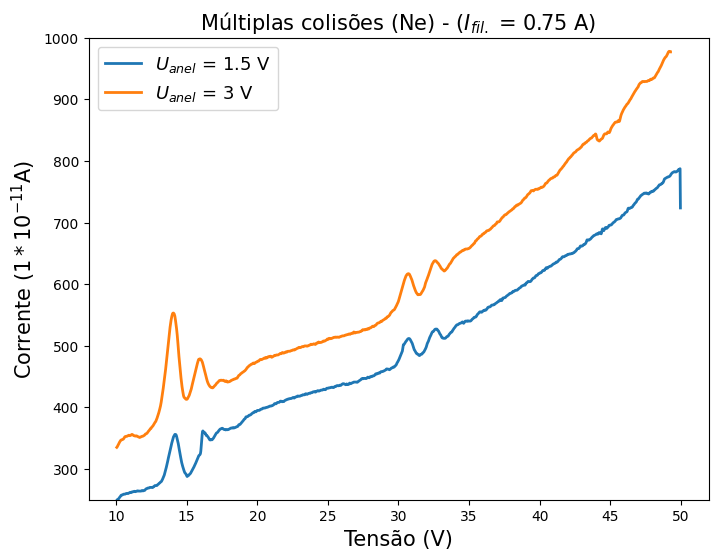

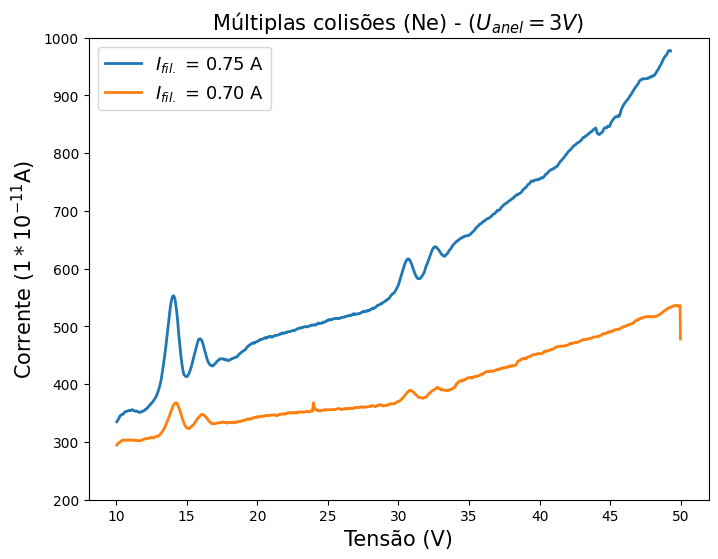

In [25]:
# Gráfico padrão Ne U=3V

v1_He = 14.017
v2_He = 15.929
v3_He = 17.478
vr_He = 30.667
v0 = vr_He - 2*v1_He
ve1_He = vr_He - v1_He
ve2_He = v0 + v2_He
ve3_He = v0 + v3_He

energias = [ve1_He, ve2_He, ve3_He]

x_line = [14.017, 15.929, 17.478, 30.667]
ymin = [523, 449, 414, 587]
ymax = [583, 509, 474, 647]
ylabel_ticks = np.arange(0, 1100, 100)

plt.figure(figsize=(8,6))
plt.plot(Ne_2["tensão"], Ne_2["media_movel"], linewidth=2)
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (Ne) - ($I_{fil.}$ = 0.75 A / $U_{anel}$ = 3 V)", fontsize=15)
plt.vlines(x=x_line, ymin=ymin, ymax=ymax, linestyle="--", color="red")
plt.text(x=13.5, y=613, s=r"$V_1$", fontsize=13)
plt.text(x=15.4, y=539, s=r"$V_2$", fontsize=13)
plt.text(x=17, y=504, s=r"$V_3$", fontsize=13)
plt.text(x=30.1, y=677, s=r"$V_R$", fontsize=13)
plt.ylabel(r"Corrente ($1*10^{-11}$A)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylim((250, 1000))
plt.show()

#Gráfico zoom Ne U=3V

plt.figure(figsize=(8,6))
plt.plot(Ne_3["tensão"], Ne_3["media_movel"], linewidth=2)
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (Ne) - ($I_{fil.}$ = 0.75 A / $U_{anel}$ = 3 V)", fontsize=15)
plt.ylabel(r"Corrente ($1*10^{-11}$A)", fontsize=15)
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylim(300,700)
plt.show()

# #Gráfico zoom Ne comparando as tensões no anel

plt.figure(figsize=(8,6))
plt.plot(Ne_1["tensão"], Ne_1["media_movel"], linewidth=2, label=r"$U_{anel}$ = 1.5 V")
plt.plot(Ne_2["tensão"], Ne_2["media_movel"], linewidth=2, label=r"$U_{anel}$ = 3 V")
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (Ne) - ($I_{fil.}$ = 0.75 A)", fontsize=15)
plt.ylabel(r"Corrente ($1*10^{-11}$A)", fontsize=15)
plt.ylim(250,1000)
plt.xlabel("Tensão (V)", fontsize=15)
plt.legend(fontsize=13, loc="upper left")
plt.show()

#Gráfico padrão comparando as correntes no filamento

plt.figure(figsize=(8,6))
plt.plot(Ne_2["tensão"], Ne_2["media_movel"], linewidth=2, label=r"$I_{fil.}$ = 0.75 A")
plt.plot(Ne_4["tensão"], Ne_4["media_movel"], linewidth=2, label=r"$I_{fil.}$ = 0.70 A")
plt.yticks(ylabel_ticks, ylabel_ticks)
plt.title(r"Múltiplas colisões (Ne) - ($U_{anel} = 3 V$)", fontsize=15)
plt.ylabel(r"Corrente ($1*10^{-11}$A)", fontsize=15)
# plt.xlim(10, 25)
plt.ylim(200, 1000)
plt.xlabel("Tensão (V)", fontsize=15)
plt.legend(fontsize=13)
plt.show()

In [26]:
print(energias)
print(v0)

[16.650000000000002, 18.562000000000005, 20.111000000000004]
2.6330000000000027
